# Check VIIRS Extraction

In [2]:
# imports
from importlib import reload
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from cartopy import crs as ccrs
import seaborn as sns

import xarray
import h5py

from remote_sensing.download import podaac
from remote_sensing.healpix import rs_healpix
from remote_sensing.netcdf import utils as nc_utils
from remote_sensing.plotting import utils as putils

from wrangler.plotting import cutout

# Open the file

In [3]:
ifile = 'ex_VIIRS_N21_2024.h5'

f = h5py.File(ifile, 'r')
f

<HDF5 file "ex_VIIRS_N21_2024.h5" (mode r)>

In [4]:
f.keys()

<KeysViewHDF5 ['fields', 'inpainted_masks', 'metadata']>

In [5]:
f['fields'].shape

(5594, 192, 192)

# Show

## Inpainted pixels

<Axes: >

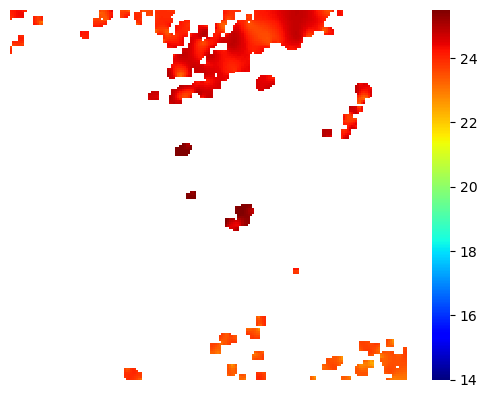

In [6]:
vmnx=(14.,25.5)
idx = 100
cutout.show_image(f['inpainted_masks'][idx], vmnx=vmnx)

## Original image

<Axes: >

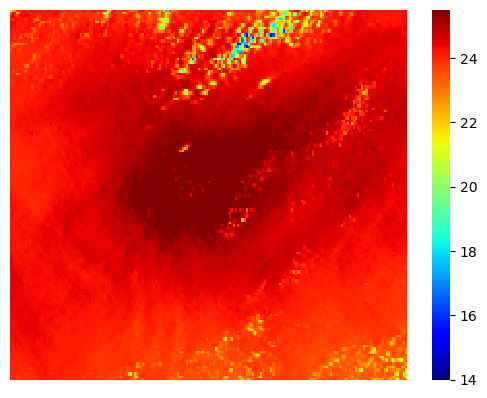

In [8]:
cutout.show_image(f['fields'][idx], vmnx=vmnx)

## Inpaint me

<Axes: >

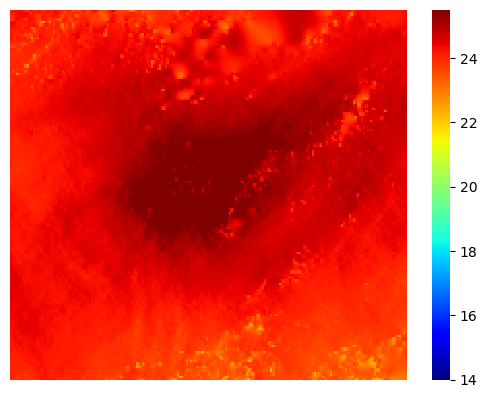

In [9]:
mask = np.isfinite(f['inpainted_masks'][idx])
image = f['fields'][idx]
image[mask] = f['inpainted_masks'][idx][mask]
#
cutout.show_image(image, vmnx=vmnx)